In [7]:
# import

import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
import copy

/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/2961062701.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


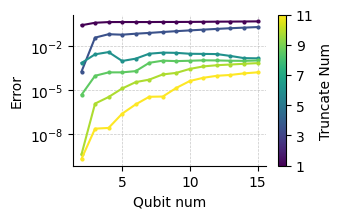

In [8]:
# Fig6a in Supplement Material

filename = 'supp_fig6.pkl'


with open(filename, 'rb') as f:
    data = pickle.load(f)

obppp_list = data.get('obppp_list')
qubit_num = data.get('qubit_num') 
MS_list = data.get('MS_list')

truncate_num_list = [1,2,3,4,5,6,7,9,11] 
qubit_num_list = [wndex for wndex in range(2,16)]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib as mpl  

scale_factor_idx = 14  

fig = plt.figure(figsize=(3.5, 2.3))


cmap = get_cmap('viridis')  


colors = []


for idx in range(len(obppp_list)):
    if truncate_num_list[idx] % 2 == 0:
        continue

    color = cmap(idx / (len(obppp_list) - 1))
    colors.append(color)  
    datas = np.array([np.abs(obppp_list[idx][index][scale_factor_idx] - MS_list[0][index][scale_factor_idx]) for index in range(len(obppp_list[idx]))], dtype=np.float32)
    datas[datas == 0] = 1e-15
    plt.plot(
        qubit_num_list,
        datas,
        marker='o',
        markersize=2,
        color=color  
    )

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel('Qubit num')
plt.ylabel('Error')
plt.yscale('log')


norm = mpl.colors.Normalize(vmin=1, vmax=11) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(truncate_num_list)  


cbar = plt.colorbar(sm,ax=ax)
cbar.set_label('Truncate Num', fontsize=10)


cbar.set_ticks(np.arange(1, 12, 2))  
cbar.ax.tick_params(labelsize=10)  


plt.tight_layout()


# plt.savefig('benchmark_of_mini_angle_neo_mini1.pdf', format='pdf', bbox_inches='tight', pad_inches=0)


plt.show()

/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/2326296205.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


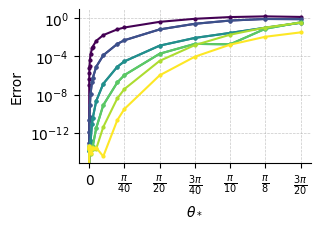

In [9]:
# Fig6b in Supplement Material


factor_list = [0, 0.0001, 0.0002, 0.0004, 0.0008, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
factor_list = [np.pi/4*x for x in factor_list]
qubit_num0 = -10




import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap 

scale_factor_idx = 8

fig = plt.figure(figsize=(3, 2))


cmap = get_cmap('viridis')  

for idx in range(len(obppp_list)):

    color = cmap(idx / (len(obppp_list) - 1))
    plt.plot(
        [factor_list[wndex] for wndex in range(len(factor_list)-4)], 
        [np.abs(obppp_list[idx][qubit_num0][scale_factor_idx] - MS_list[0][qubit_num0][scale_factor_idx]) for scale_factor_idx in range(len(MS_list[0][qubit_num0])-4)],
        label=f'truncate num = {truncate_num_list[idx]}', 
        marker='o', 
        markersize=2, 
        color=color  
    )


plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


plt.yscale('log')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



xticks = [0, np.pi/40,np.pi/20,3*np.pi/40, np.pi/10, np.pi/8, np.pi*3/20]
xtick_labels = ['0', r'$\frac{\pi}{40}$', r'$\frac{\pi}{20}$', r'$\frac{3\pi}{40}$', r'$\frac{\pi}{10}$', r'$\frac{\pi}{8}$', r'$\frac{3\pi}{20}$']




plt.xticks(xticks, xtick_labels)


plt.xlabel(r'$\theta_*$')

plt.ylabel('Error')


# plt.savefig('benchmark_of_mini_angle_neo_mini2.pdf', format='pdf', bbox_inches='tight', pad_inches=0)



plt.show()



/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/4197172503.py:237: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Blues')
/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/4197172503.py:240: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = get_cmap('Reds')


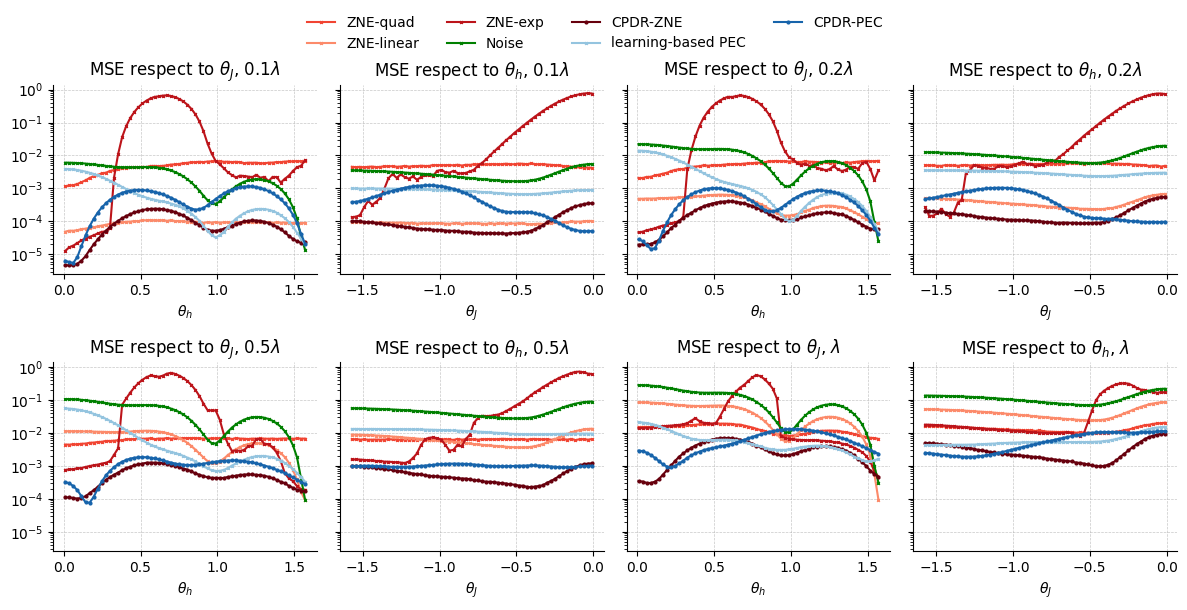

In [ ]:
# Fig in Supplement Material IV part 1

# supp_IV_data

def get_file_name(qubit_num = 10, layer_num = 5):
    truncate_num = 2
    if qubit_num == 10 and layer_num == 5 and truncate_num == 2:

        data_all = []

        with open('supp_IV_data/data_all_QEM_MSEfig_10_5_1.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_10_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])



        with open('supp_IV_data/data_all_QEM_MSEfig_10_5_5.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])



        with open('supp_IV_data/data_all_QEM_MSEfig_10_5_10.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])
        save_name = '10_5_2'



    if qubit_num == 9 and layer_num == 5 and truncate_num == 2:

        data_all = []

        with open('supp_IV_data/data_all_QEM_MSEfig_9_5_1.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_9_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])



        with open('supp_IV_data/data_all_QEM_MSEfig_9_5_5.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_9_5_10.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])
        save_name = '9_5_2'

    if qubit_num == 8 and layer_num == 6 and truncate_num == 2:

        data_all = []

        with open('supp_IV_data/data_all_QEM_MSEfig_8_6_1.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_8_6_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_8_6_5.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])

        with open('supp_IV_data/data_all_QEM_MSEfig_8_6_10.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])
        save_name = '8_6_2'


    if qubit_num == 8 and layer_num == 4 and truncate_num == 2:

        data_all = []

        with open('supp_IV_data/data_all_QEM_MSEfig_8_4_1.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])


        with open('supp_IV_data/data_all_QEM_MSEfig_8_4_2.pkl', 'rb') as f:
            data = pickle.load(f)

        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])



        with open('supp_IV_data/data_all_QEM_MSEfig_8_4_5.pkl', 'rb') as f:
            data = pickle.load(f)

        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])



        with open('supp_IV_data/data_all_QEM_MSEfig_8_4_10.pkl', 'rb') as f:
            data = pickle.load(f)


        data_all_th = data['data_all_th']
        data_all_tJ = data['data_all_tJ']

        data_all.append([copy.deepcopy(data_all_th), copy.deepcopy(data_all_tJ)])
        save_name = '8_4_2'

    return data_all,save_name


# following 4 pair is shown in Supp. IV
# (qubit_num = 10, layer_num = 5), (qubit_num = 9, layer_num = 5), (qubit_num = 8, layer_num = 6), (qubit_num = 8, layer_num = 4)
# We take (qubit_num = 10, layer_num = 5) as example in the following code.
data_all,save_name = get_file_name(qubit_num = 10, layer_num = 5)





# draw


fig, axes = plt.subplots(2, 4, figsize=(12, 6), sharey=True)  


axes[0,0].set_title(r'MSE respect to $\theta_J$, $0.1\lambda$')
axes[0,0].set_xlabel(r'$\theta_h$')
axes[0,1].set_title(r'MSE respect to $\theta_h$, $0.1\lambda$')
axes[0,1].set_xlabel(r'$\theta_J$')

axes[0,2].set_title(r'MSE respect to $\theta_J$, $0.2\lambda$')
axes[0,2].set_xlabel(r'$\theta_h$')
axes[0,3].set_title(r'MSE respect to $\theta_h$, $0.2\lambda$')
axes[0,3].set_xlabel(r'$\theta_J$')

axes[1,0].set_title(r'MSE respect to $\theta_J$, $0.5\lambda$')
axes[1,0].set_xlabel(r'$\theta_h$')
axes[1,1].set_title(r'MSE respect to $\theta_h$, $0.5\lambda$')
axes[1,1].set_xlabel(r'$\theta_J$')

axes[1,2].set_title(r'MSE respect to $\theta_J$, $\lambda$')
axes[1,2].set_xlabel(r'$\theta_h$')
axes[1,3].set_title(r'MSE respect to $\theta_h$, $\lambda$')
axes[1,3].set_xlabel(r'$\theta_J$')






viridis = get_cmap('Blues')  
colors = [viridis(i / 5) for i in range(2,5)]  

magma = get_cmap('Reds')  
colors2 = [magma(i / 5) for i in range(2,6)] 





for index in range(8):
    if index < 4:
        a0 = 0
    else:
        a0 = 1
    
    a1 = index % 4

    if index == 0 or index == 1:
        noise_idx = 0
    elif index == 2 or index == 3:
        noise_idx = 1
    elif index == 4 or index == 5:
        noise_idx = 2
    else:
        noise_idx = 3

    if index % 2==0:
        hJ_index =1 
    else:
        hJ_index = 0



    axes[a0,a1].plot(data_all[noise_idx][hJ_index][0][0], data_all[noise_idx][hJ_index][0][1], label='ZNE-quad', marker='x', markersize=2,color = colors2[1])
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][1][0], data_all[noise_idx][hJ_index][1][1], label='ZNE-linear', marker='x', markersize=2, color = colors2[0])
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][2][0], data_all[noise_idx][hJ_index][2][1], label='ZNE-exp', marker='x', markersize=2, color = colors2[2])
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][3][0], data_all[noise_idx][hJ_index][3][1], label='Noise', marker='x', markersize=2, color = 'green')
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][4][0], data_all[noise_idx][hJ_index][4][1], label='CPDR-ZNE', marker='o', markersize=2, color = colors2[3])
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][5][0], data_all[noise_idx][hJ_index][5][1], label='learning-based PEC', marker='x', markersize=2, color = colors[0])
    axes[a0,a1].plot(data_all[noise_idx][hJ_index][6][0], data_all[noise_idx][hJ_index][6][1], label='CPDR-PEC', marker='o', markersize=2, color = colors[2])
    
    

    axes[a0,a1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


    axes[a0,a1].spines['top'].set_visible(False)
    axes[a0,a1].spines['right'].set_visible(False)


plt.yscale('log')

handles0, labels0 = axes[0,0].get_legend_handles_labels()
fig.legend(handles0, labels0, loc='upper center', ncol=4,frameon=False,bbox_to_anchor=(0.5, 1.02))
plt.tight_layout(rect=[0, 0, 1, 0.95])  




# plt.savefig('Ising_MSE_all_QEM_protocol_'+save_name+'_all.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

plt.show()

/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/4163160920.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Blues')
/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/4163160920.py:216: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = get_cmap('Reds')
/var/folders/dd/77001h9x7jl9pspx4_gq13lw0000gn/T/ipykernel_17811/4163160920.py:236: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Pur

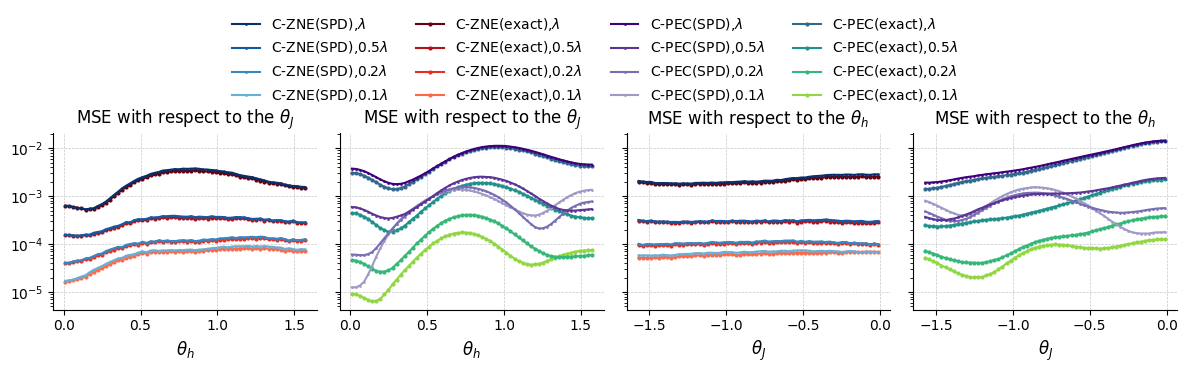

In [ ]:
# Fig in Supplement Material IV part 2

# supp_IV_data





def get_filename(qubit_num = 10, layer_num = 5):
    if qubit_num == 10 and layer_num == 5:

        data_all = []

        with open('supp_IV_data/data_MSEfig_10_5_1_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])


        with open('supp_IV_data/data_MSEfig_10_5_2_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_10_5_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])


        with open('supp_IV_data/data_MSEfig_10_5_10_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])
        save_name = '10_5_2'



    if qubit_num == 9 and layer_num == 5:

        data_all = []

        with open('supp_IV_data/data_MSEfig_9_5_1_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])


        with open('supp_IV_data/data_MSEfig_9_5_2_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_9_5_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_9_5_10_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])
        save_name = '9_5_2'

    if qubit_num == 8 and layer_num == 6:

        data_all = []

        with open('supp_IV_data/data_MSEfig_8_6_1_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])


        with open('supp_IV_data/data_MSEfig_8_6_2_2.pkl', 'rb') as f:
            data = pickle.load(f)

        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_8_6_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_8_6_10_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])
        save_name = '8_6_2'


    if qubit_num == 8 and layer_num == 4:

        data_all = []

        with open('supp_IV_data/data_MSEfig_8_4_1_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])


        with open('supp_IV_data/data_MSEfig_8_4_2_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_8_4_5_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])



        with open('supp_IV_data/data_MSEfig_8_4_10_2.pkl', 'rb') as f:
            data = pickle.load(f)


        data_MSE_th = data['data_MSE_th']
        data_MSE_tJ = data['data_MSE_tJ']

        data_all.append([copy.deepcopy(data_MSE_th), copy.deepcopy(data_MSE_tJ)])
        save_name = '8_4_2'

    return data_all,save_name


# following 4 pair is shown in Supp. IV
# (qubit_num = 10, layer_num = 5), (qubit_num = 9, layer_num = 5), (qubit_num = 8, layer_num = 6), (qubit_num = 8, layer_num = 4)
# We take (qubit_num = 8, layer_num = 4) as example in the following code.
data_all,save_name = get_filename(qubit_num = 8, layer_num = 4)






fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True) 


viridis = get_cmap('Blues')  
colors = [viridis(i / 6) for i in range(3,7)] 

magma = get_cmap('Reds') 
colors2 = [magma(i / 6) for i in range(3,7)] 



data_all[0][0]

for index in range(0,4):
    axes[0].plot(data_all[index][0][0][0], data_all[index][1][0][1], label='CPDR-ZNE(SPD training set)', marker='^', markersize=1,color=colors[index],zorder=10)
    axes[0].plot(data_all[index][0][2][0], data_all[index][1][2][1], label='CPDR-ZNE(exact training set)', marker='o', markersize=2,color=colors2[index])


axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].set_xlabel(r'$\theta_h$', fontsize=12)


viridis = get_cmap('Purples') 
colors = [viridis(i / 6) for i in range(3,7)]  

magma = get_cmap('viridis')  
colors2 = [magma(i / 6) for i in [5,4,3,2]]  





for index in range(0,4):

    axes[1].plot(data_all[index][0][1][0], data_all[index][1][1][1], label='CPDR-PEC(SPD training set)', marker='^', markersize=1,color=colors[index],zorder=10)

    axes[1].plot(data_all[index][0][3][0], data_all[index][1][3][1], label='CPDR-PEC(exact training set)', marker='o', markersize=2,color=colors2[index])





axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].set_xlabel(r'$\theta_h$', fontsize=12)


viridis = get_cmap('Blues') 
colors = [viridis(i / 6) for i in range(3,7)]  

magma = get_cmap('Reds') 
colors2 = [magma(i / 6) for i in range(3,7)]  


for index in range(0,4):
    axes[2].plot(data_all[index][1][0][0], data_all[index][0][0][1], label='CPDR-ZNE(SPD training set)', marker='^', markersize=1,color=colors[index],zorder=10)
    axes[2].plot(data_all[index][1][2][0], data_all[index][0][2][1], label='CPDR-ZNE(exact training set)', marker='o', markersize=2,color=colors2[index])


axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

axes[2].set_xlabel(r'$\theta_J$', fontsize=12)

viridis = get_cmap('Purples')  
colors = [viridis(i / 6) for i in range(3,7)]  

magma = get_cmap('viridis')  
colors2 = [magma(i / 6) for i in [5,4,3,2]]  


for index in range(0,4):

    axes[3].plot(data_all[index][1][1][0], data_all[index][0][1][1], label='CPDR-PEC(SPD training set)', marker='^', markersize=1,color=colors[index],zorder=10)
    axes[3].plot(data_all[index][1][3][0], data_all[index][0][3][1], label='CPDR-PEC(exact training set)', marker='o', markersize=2,color=colors2[index])




axes[3].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)

axes[3].set_xlabel(r'$\theta_J$', fontsize=12)



axes[0].set_title(r'MSE with respect to the $\theta_J$')
axes[1].set_title(r'MSE with respect to the $\theta_J$')
axes[2].set_title(r'MSE with respect to the $\theta_h$')
axes[3].set_title(r'MSE with respect to the $\theta_h$')


handles0, labels0 = axes[0].get_legend_handles_labels()
handles1, labels1 = axes[1].get_legend_handles_labels()

label_my = [r"C-ZNE(SPD),$\lambda$",r"C-ZNE(SPD),$0.5\lambda$",r"C-ZNE(SPD),$0.2\lambda$",r"C-ZNE(SPD),$0.1\lambda$"] + [r"C-ZNE(exact),$\lambda$",r"C-ZNE(exact),$0.5\lambda$",r"C-ZNE(exact),$0.2\lambda$",r"C-ZNE(exact),$0.1\lambda$"]
label_my += [r"C-PEC(SPD),$\lambda$",r"C-PEC(SPD),$0.5\lambda$",r"C-PEC(SPD),$0.2\lambda$",r"C-PEC(SPD),$0.1\lambda$"]
label_my += [r"C-PEC(exact),$\lambda$",r"C-PEC(exact),$0.5\lambda$",r"C-PEC(exact),$0.2\lambda$",r"C-PEC(exact),$0.1\lambda$"]
fig.legend([handles0[6],handles0[4],handles0[2],handles0[0],handles0[7],handles0[5],handles0[3],handles0[1],handles1[6],handles1[4],handles1[2],handles1[0],handles1[7],handles1[5],handles1[3],handles1[1]], label_my, loc='upper center', ncol=4,frameon=False,bbox_to_anchor=(0.5, 1.25))


plt.yscale('log')


plt.tight_layout(rect=[0, 0, 1, 0.95])  

# plt.savefig('Ising_Compare_data_all_'+save_name+'_all.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

plt.show()
